In [105]:
from random import random, choice
from matplotlib import pyplot as plt
import numpy as np
import gymnasium as gym

In [106]:
num_episodes = 5000

gamma = 1

epsilon = 1.0
epsilon_decay = 0.99
min_epsilon = 0.01

alpha = 0.2
alpha_decay = 0.9
min_alpha = 0.01

fail_reward = -100

In [107]:
class LinearSarsa():
    def __init__(self) -> None:
        # self.w = np.random.rand(4, 2)
        self.w = np.zeros((4, 2))
        self.iteration = 0
        self.alpha = alpha
        self.epsilon = epsilon


    def _q_hat(
            self, 
            states: np.ndarray, 
            action: int
            ) -> float:
        return np.dot(states, self.w)[action]


    def predict(
            self, 
            states: np.ndarray,
            ) -> int:
        self.iteration += 1

        if self.alpha > min_alpha:
            # self.alpha = 1 / self.iteration
            self.alpha *= alpha_decay
        if self.epsilon > min_epsilon:
            # self.epsilon = 1 / self.iteration
            self.epsilon *= epsilon_decay

        actions = [0, 1]

        # Policy iteration
        if random() < self.epsilon:
            # Exploration (random)
            return choice(actions)    
        else:
            # Greedy
            qs = [self._q_hat(states, action) for action in actions]
            return np.argmax(qs)
        

    def control(
            self, 
            states: np.ndarray, 
            action: int, 
            reward: float, 
            next_states: np.ndarray,
            terminated: bool,
            ):
        # Policy evaluation
        if not terminated:
            next_action = self.predict(next_states)
            td_target = reward + gamma * self._q_hat(next_states, next_action)
            td_prediction = self._q_hat(states, action)
        else:
            td_target = fail_reward
            td_prediction = 0
            
        # td_prediction = self._q_hat(states, action)
        td_error = td_target - td_prediction
        delta = self.alpha * td_error * states
            

        # Update parameters
        self.w[:, action] += delta
        return td_target, td_prediction

In [146]:
env_name = "CartPole-v1"
env = gym.make(env_name)
env = gym.make(env_name, render_mode="human")

sarsa = LinearSarsa()

try:
    rewards = np.array([])
    
    for ep in range(num_episodes):
        states, info = env.reset()

        for time in range(500):
            action = sarsa.predict(states)
            next_states, reward, terminated, truncated, info = env.step(action)

            sarsa.control(states, action, reward, next_states, terminated)

            if terminated or truncated:
                if ep % 500 == 0:
                    print(f"Episode {ep} finished. reward: {time + 1}")
                rewards = np.append(rewards, time + 1)
                break
 
            states = next_states

finally:
    env.close()
    print("weights:", sarsa.w)

Episode 0 finished. reward: 11
weights: [[ 0.94055072 -0.25290591]
 [ 5.73658114  0.5651701 ]
 [-0.37758114 -1.96627369]
 [-6.28510527 -8.4843981 ]]


KeyboardInterrupt: 

In [143]:
env = gym.make(env_name, render_mode="human") # Visible
try:
    states, info = env.reset()
    action = sarsa.predict(states)

    for time in range(500):
        next_states, reward, terminated, truncated, info = env.step(action)
        
        env.render()
        if terminated or truncated:
            break

        next_action = sarsa.predict(next_states)
        sarsa.control(states, action, reward, next_states, False)
finally:
    env.close()
    print(time)

8


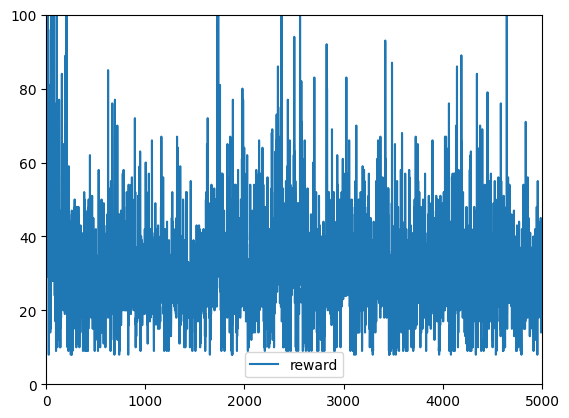

In [131]:
plt.xlim(0, 5000)
plt.ylim(0, 100)
plt.plot(rewards, label='reward')
plt.legend()
plt.show()